In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model
#from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import ImageFont
from collections import defaultdict
from keras.utils import plot_model

In [2]:
image_size = (224,224,3)
model = MobileNetV2(input_shape=image_size, include_top=False, weights='imagenet')

In [3]:
for layers in model.layers:
    layers.trainable=False

In [4]:
arc = Model(inputs=model.input, outputs=Dense(2, activation="sigmoid")(Flatten()(model.output)))

In [5]:
train_path = "E:\\Assignment\\Etc\\Datasets\\COVID-19_Pneumonia\\train"
validation_path = "E:\\Assignment\\Etc\\Datasets\\COVID-19_Pneumonia\\val"
test_path = "E:\\Assignment\\Etc\\Datasets\\COVID-19_Pneumonia\\test"

train_augmen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.3,horizontal_flip=True)
validation_augmen=ImageDataGenerator(rescale=1./255)
test_augmen=ImageDataGenerator(rescale=1./255)

final_train=train_augmen.flow_from_directory(train_path,target_size=(224,224))
step_size = len(final_train)
final_validation=validation_augmen.flow_from_directory(validation_path,target_size=(224,224))
final_test=test_augmen.flow_from_directory(test_path,target_size=(224,224))

Found 7420 images belonging to 2 classes.
Found 390 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [6]:
initial_learning_rate = 0.00000005
def lr_schedule(epoch):
    if epoch < 200:
        return initial_learning_rate
        
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [7]:
arc.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [8]:
eff = arc.fit(final_train, epochs = 100, validation_data = final_validation, steps_per_epoch = len(final_train), validation_steps = len(final_validation), callbacks=[lr_callback])

Epoch 1/100
232/232 [==============================] - 335s 1s/step - loss: 0.6837 - accuracy: 0.6927 - precision: 0.6130 - recall: 0.7136 - val_loss: 0.7516 - val_accuracy: 0.6179 - val_precision: 0.5906 - val_recall: 0.7436 - lr: 5.0000e-08
Epoch 2/100
232/232 [==============================] - 193s 830ms/step - loss: 0.6602 - accuracy: 0.7133 - precision: 0.6343 - recall: 0.7178 - val_loss: 0.7361 - val_accuracy: 0.6333 - val_precision: 0.5996 - val_recall: 0.7564 - lr: 5.0000e-08
Epoch 3/100
232/232 [==============================] - 194s 837ms/step - loss: 0.6408 - accuracy: 0.7280 - precision: 0.6432 - recall: 0.7214 - val_loss: 0.7210 - val_accuracy: 0.6410 - val_precision: 0.6099 - val_recall: 0.7615 - lr: 5.0000e-08
Epoch 4/100
232/232 [==============================] - 192s 826ms/step - loss: 0.6122 - accuracy: 0.7505 - precision: 0.6647 - recall: 0.7314 - val_loss: 0.7067 - val_accuracy: 0.6436 - val_precision: 0.6124 - val_recall: 0.7615 - lr: 5.0000e-08
Epoch 5/100
232/232

232/232 [==============================] - 183s 786ms/step - loss: 0.2534 - accuracy: 0.9540 - precision: 0.9038 - recall: 0.9150 - val_loss: 0.4471 - val_accuracy: 0.7949 - val_precision: 0.7610 - val_recall: 0.8410 - lr: 5.0000e-08
Epoch 35/100
232/232 [==============================] - 185s 797ms/step - loss: 0.2449 - accuracy: 0.9520 - precision: 0.9101 - recall: 0.9158 - val_loss: 0.4421 - val_accuracy: 0.8000 - val_precision: 0.7646 - val_recall: 0.8410 - lr: 5.0000e-08
Epoch 36/100
232/232 [==============================] - 187s 807ms/step - loss: 0.2407 - accuracy: 0.9539 - precision: 0.9097 - recall: 0.9167 - val_loss: 0.4364 - val_accuracy: 0.8051 - val_precision: 0.7651 - val_recall: 0.8436 - lr: 5.0000e-08
Epoch 37/100
232/232 [==============================] - 186s 802ms/step - loss: 0.2284 - accuracy: 0.9605 - precision: 0.9201 - recall: 0.9198 - val_loss: 0.4315 - val_accuracy: 0.8051 - val_precision: 0.7669 - val_recall: 0.8436 - lr: 5.0000e-08
Epoch 38/100
232/232 [===

232/232 [==============================] - 183s 788ms/step - loss: 0.1232 - accuracy: 0.9799 - precision: 0.9630 - recall: 0.9690 - val_loss: 0.3314 - val_accuracy: 0.8538 - val_precision: 0.8149 - val_recall: 0.8692 - lr: 5.0000e-08
Epoch 68/100
232/232 [==============================] - 185s 794ms/step - loss: 0.1223 - accuracy: 0.9810 - precision: 0.9650 - recall: 0.9663 - val_loss: 0.3296 - val_accuracy: 0.8538 - val_precision: 0.8153 - val_recall: 0.8718 - lr: 5.0000e-08
Epoch 69/100
232/232 [==============================] - 185s 797ms/step - loss: 0.1183 - accuracy: 0.9837 - precision: 0.9682 - recall: 0.9697 - val_loss: 0.3264 - val_accuracy: 0.8538 - val_precision: 0.8153 - val_recall: 0.8718 - lr: 5.0000e-08
Epoch 70/100
232/232 [==============================] - 185s 795ms/step - loss: 0.1137 - accuracy: 0.9830 - precision: 0.9664 - recall: 0.9732 - val_loss: 0.3239 - val_accuracy: 0.8538 - val_precision: 0.8153 - val_recall: 0.8718 - lr: 5.0000e-08
Epoch 71/100
232/232 [===

232/232 [==============================] - 193s 832ms/step - loss: 0.0778 - accuracy: 0.9854 - precision: 0.9792 - recall: 0.9782 - val_loss: 0.2788 - val_accuracy: 0.8846 - val_precision: 0.8547 - val_recall: 0.8897 - lr: 5.0000e-08


In [9]:
eva = arc.evaluate(final_test)
print(eva)

10/10 [==============================] - 9s 890ms/step - loss: 0.2901 - accuracy: 0.8604 - precision: 0.8309 - recall: 0.9091
[0.29006490111351013, 0.8603895902633667, 0.8308605551719666, 0.9090909361839294]


In [10]:
loss = eva[0]
accuracy = eva[1]
precision = eva[2]
recall = eva[3]
f1_score = 2 * ((precision * recall) / (precision + recall))

print("Calculations are shown here\n")
print("Loss:",loss)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1_score)

Calculations are shown here

Loss: 0.29006490111351013
Accuracy: 0.8603895902633667
Precision: 0.8308605551719666
Recall: 0.9090909361839294
F1 score: 0.8682170781105816


In [11]:
#Verify results
test_loss, test_accuracy, test_precision, test_recall = arc.evaluate(final_test)
f1_score = 2 * ((test_precision * test_recall) / (test_precision + test_recall))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

10/10 [==============================] - 9s 865ms/step - loss: 0.2901 - accuracy: 0.8604 - precision: 0.8309 - recall: 0.9091
Test Loss: 0.2900649309158325
Test Accuracy: 0.8603895902633667
Test Precision: 0.8308605551719666
Test Recall: 0.9090909361839294


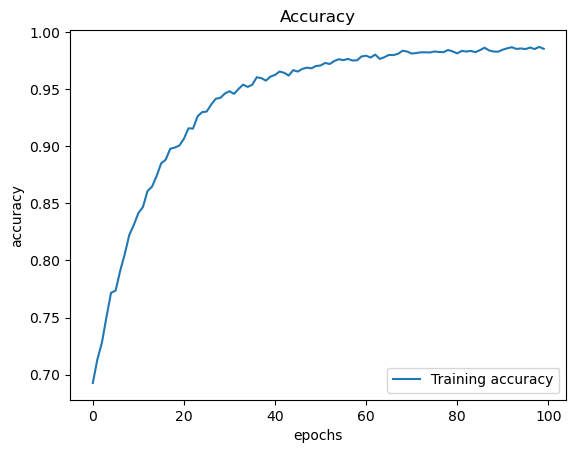

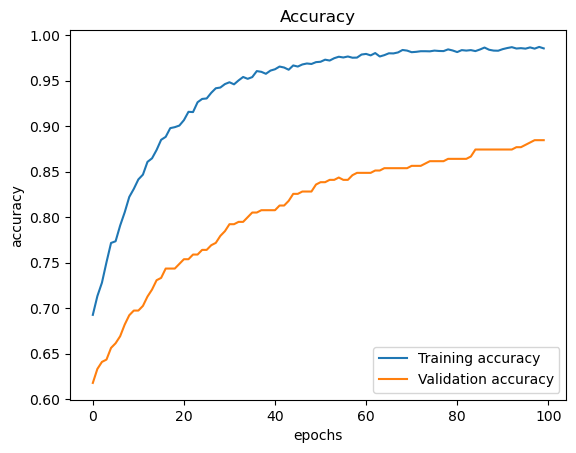

In [12]:
#Accuracy plot
plt.plot(eff.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Training accuracy'], loc = 'lower right')
plt.show()

plt.plot(eff.history['accuracy'])
plt.plot(eff.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Training accuracy','Validation accuracy'], loc = 'lower right')
plt.show()

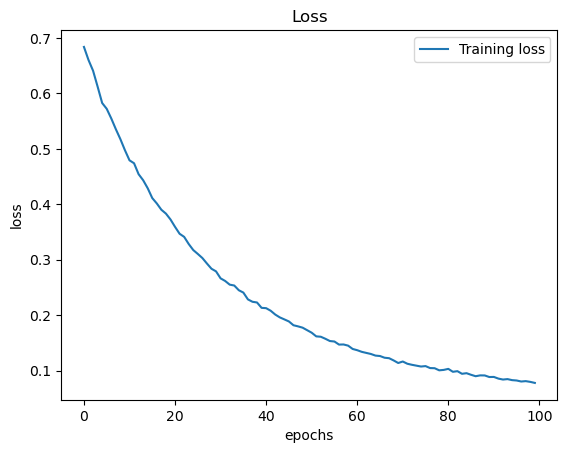

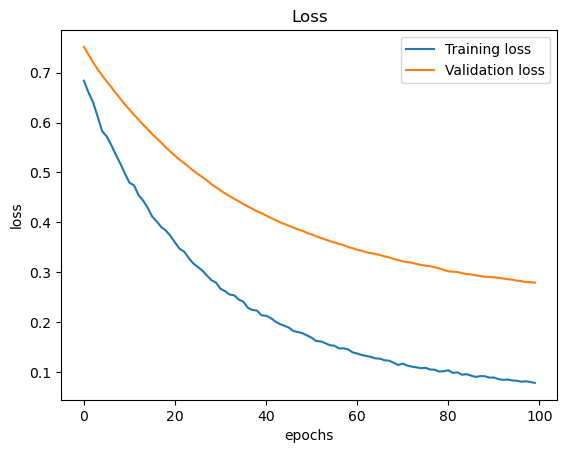

In [13]:
#Loss plot
plt.plot(eff.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training loss'], loc = 'upper right')
plt.show()

plt.plot(eff.history['loss'])
plt.plot(eff.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training loss','Validation loss'], loc = 'upper right')
plt.show()

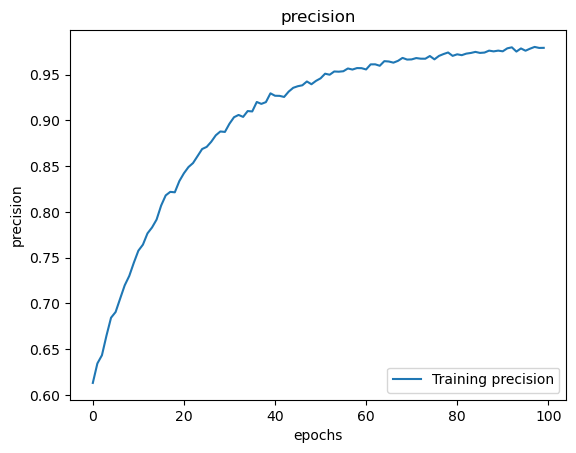

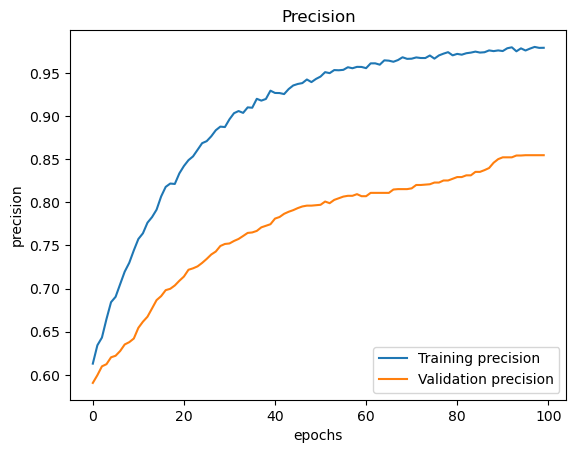

In [14]:
#Precision plot
plt.plot(eff.history['precision'])
plt.title('precision')
plt.ylabel('precision')
plt.xlabel('epochs')
plt.legend(['Training precision'], loc = 'lower right')
plt.show()


plt.plot(eff.history['precision'])
plt.plot(eff.history['val_precision'])
plt.title('Precision')
plt.ylabel('precision')
plt.xlabel('epochs')
plt.legend(['Training precision','Validation precision'], loc = 'lower right')
plt.show()



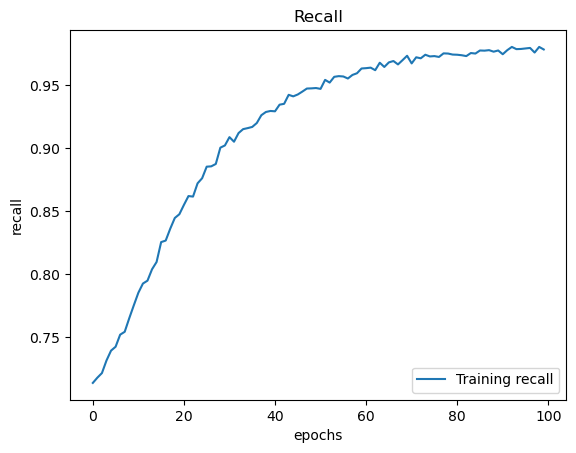

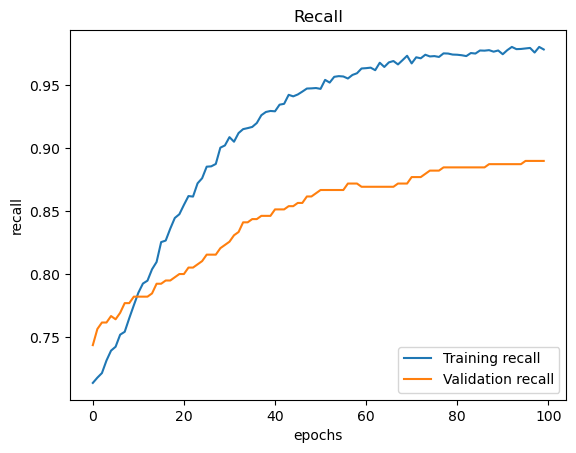

In [15]:
#Recall plot
plt.plot(eff.history['recall'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epochs')
plt.legend(['Training recall'], loc = 'lower right')
plt.show()

plt.plot(eff.history['recall'])
plt.plot(eff.history['val_recall'])
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epochs')
plt.legend(['Training recall','Validation recall'], loc = 'lower right')
plt.show()

In [16]:
arc.save('MobileNetV2_100_Epochs.h5')

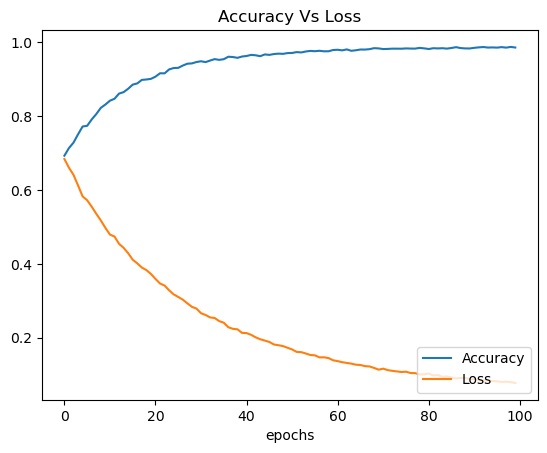

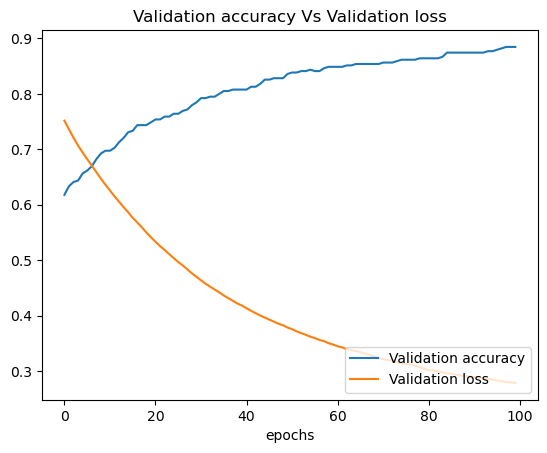

In [17]:
#Accuracy vs Loss plot
plt.plot(eff.history['accuracy'])
plt.plot(eff.history['loss'])
plt.title('Accuracy Vs Loss')
#plt.ylabel('accuracy vs loss')
plt.xlabel('epochs')
plt.legend(['Accuracy','Loss'], loc = 'lower right')
plt.show()

#Validation Accuracy vs Validation Loss plot
plt.plot(eff.history['val_accuracy'])
plt.plot(eff.history['val_loss'])
plt.title('Validation accuracy Vs Validation loss')
plt.xlabel('epochs')
plt.legend(['Validation accuracy','Validation loss'], loc = 'lower right')
plt.show()

10/10 [==============================] - 10s 856ms/step


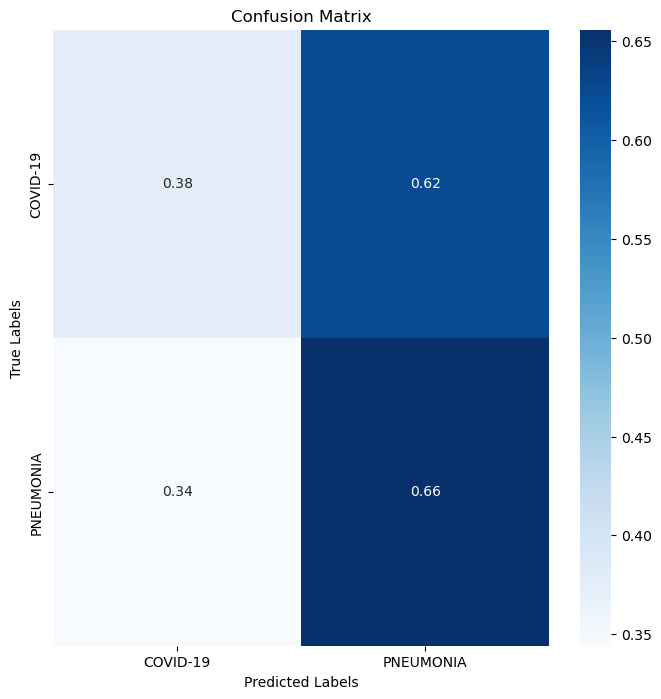

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = arc.predict(final_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = final_test.classes


cm = confusion_matrix(y_true, y_pred)

class_names = list(final_test.class_indices.keys())

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 8))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
